<a href="https://colab.research.google.com/github/katietang1/CPSC-392-Final-Data/blob/main/CPSC392KTangFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np
from plotnine import *

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import train_test_split # simple TT split cv

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/katietang1/CPSC-392-Final-Data/main/housing.csv?token=GHSAT0AAAAAABRWHEN76CUBHTQFQ4377NOCYT25GQA")
df.head()
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df = df.dropna()
df.reset_index(inplace = True)

# create dummies for categorical variable 
dummies = pd.get_dummies(df, columns = ["ocean_proximity"])
df = dummies
df

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20429,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20430,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20431,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [ ]:
predictors = ["median_income", "households", "population", "total_rooms", "housing_median_age", "ocean_proximity_<1H OCEAN", "ocean_proximity_INLAND", "ocean_proximity_ISLAND", "ocean_proximity_NEAR BAY", "ocean_proximity_NEAR OCEAN"]
contin_predictors = ["median_income", "households", "population", "total_rooms", "housing_median_age"]

X = df[predictors]
y = df["median_house_value"]

# tts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# z score
z = StandardScaler()
z.fit(X_train[contin_predictors])
X_train[contin_predictors] = z.transform(X_train[contin_predictors])
X_test[contin_predictors] = z.transform(X_test[contin_predictors])

# fit Linear Regression
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

# predict
y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)

#mse and r2
print("Scores for train set: ")
print("Mean squared error: ", mean_squared_error(y_train, y_pred_train))
print("R2: ", r2_score(y_train, y_pred_train))
print()
print("Scores for test set: ")
print("Mean squared error: ", mean_squared_error(y_test, y_pred_test))
print("R2: ", r2_score(y_test, y_pred_test))

Scores for train set: 
Mean squared error:  4887064767.90469
R2:  0.6312611580095007

Scores for test set: 
Mean squared error:  4975060399.76644
R2:  0.6343969743754806


Our model is barely overfit as the test set accuracy is just a tiny bit higher than train set, this overfit amount is not alarming 

Question: According to PCA, how many principal components should we keep if we want to explain 75% of the variance? What about 85%?

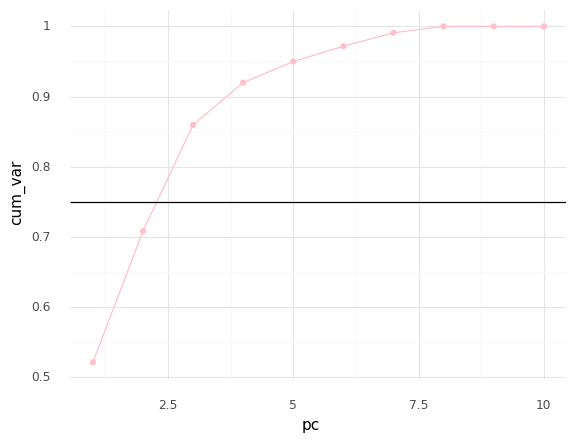

<ggplot: (8768559393337)>

In [ ]:
# fit with PCA
pca = PCA()
pca.fit(X_train)

pcaDF = pd.DataFrame({"expl_var" :
                      pca.explained_variance_ratio_,
                      "pc": range(1,11),
                      "cum_var":
                      pca.explained_variance_ratio_.cumsum()})

#scree plot of cumulative variance, 75%
(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "pink") +
 geom_point(color = "pink") + geom_hline(yintercept = 0.75) + theme_minimal())

To keep 75% of the original variance, we would need to keep 2 PCs

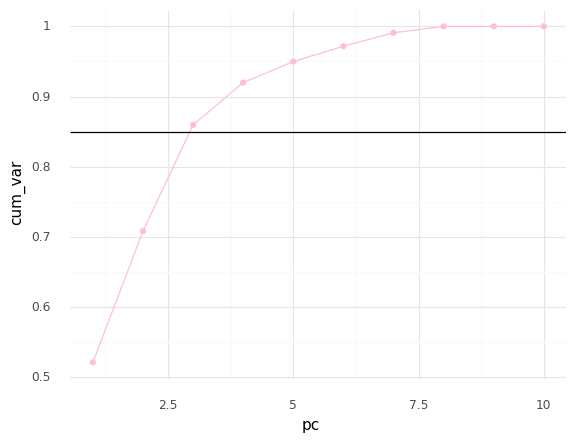

<ggplot: (8768553819537)>

In [ ]:
#scree plot of cumulative variance, 85%
(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "pink") +
 geom_point(color = "pink") + geom_hline(yintercept = 0.85) + theme_minimal())

To keep 85% of the original variance, we would also need to keep 2 PCs, almost 3.

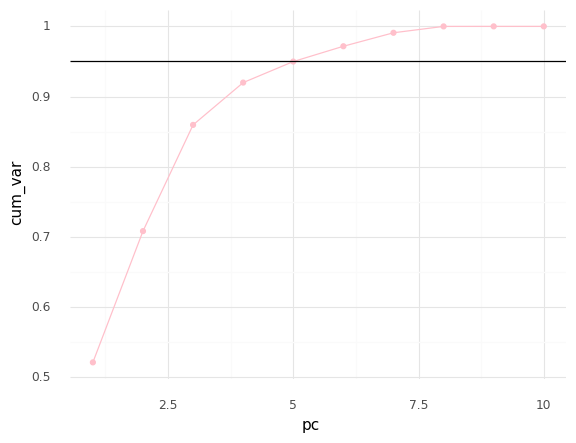

<ggplot: (8768553483717)>

In [ ]:
#scree plot of cumulative variance, 95%
(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "pink") +
 geom_point(color = "pink") + geom_hline(yintercept = 0.95) + theme_minimal())

We would need 5 PCs to keep 95% of the variance 

In [ ]:
# model with PC components 
PC5_train = pca.transform(X_train)
PC5_train = pd.DataFrame(PC5_train[:,0:5])

PC5_test = pca.transform(X_test)
PC5_test = pd.DataFrame(PC5_test[:,0:5])


#train set
LR2 = LinearRegression()
LR2.fit(PC5_train, y_train)
y_pred_train_PCA = LR2.predict(PC5_train)
print("5 PCs for train:   ")
print("Mean squared error: ", mean_squared_error(y_train, y_pred_train_PCA))
print("R2: ", r2_score(y_train, y_pred_train_PCA))
print()
#test set
LR3 = LinearRegression()
LR3.fit(PC5_test, y_test)
y_pred_test_PCA = LR3.predict(PC5_test)
print("5 PCs for test:   ")
print("Mean squared error: ", mean_squared_error(y_test, y_pred_test_PCA))
print("R2: ", r2_score(y_test, y_pred_test_PCA))

5 PCs for train:   
Mean squared error:  5206183183.305669
R2:  0.6071830332984072

5 PCs for test:   
Mean squared error:  5387616959.53553
R2:  0.6040793672766998


Our non-PCA original model performs slightly better than the reduced model, meaning all our variables are important and contribute a certain amount. Our dataset is pretty large, so we could benefit from dimentionality reduction. But because the accuracy is already low, we will use the orignal linear regression to compute our predictions to keep as much variance as possible. 

Question:  What are the predicted median house values for houses of different ocean proximities? Do houses with closer ocean proximity tend to have higher predicted values?

In [ ]:
# 5 dataframes for each ocean proximity 

H_OCEAN_df = df["ocean_proximity_<1H OCEAN"] == 1
H_OCEAN_df = df.loc[H_OCEAN_df]
H_OCEAN_X = H_OCEAN_df[predictors]
H_OCEAN_y = H_OCEAN_df["median_house_value"]

INLAND_df = df["ocean_proximity_INLAND"] == 1
INLAND_df = df.loc[INLAND_df]
INLAND_X = INLAND_df[predictors]
INLAND_y =INLAND_df["median_house_value"]

ISLAND_df = df["ocean_proximity_ISLAND"] == 1
ISLAND_df = df.loc[ISLAND_df]
ISLAND_X = ISLAND_df[predictors]
ISLAND_y =ISLAND_df["median_house_value"]

NEARBAY_df = df["ocean_proximity_NEAR BAY"] == 1
NEARBAY_df = df.loc[NEARBAY_df]
NEARBAY_X = NEARBAY_df[predictors]
NEARBAY_y =NEARBAY_df["median_house_value"]

NEAROCEAN_df = df["ocean_proximity_NEAR OCEAN"] == 1
NEAROCEAN_df = df.loc[NEAROCEAN_df]
NEAROCEAN_X = NEAROCEAN_df[predictors]
NEAROCEAN_y = NEAROCEAN_df["median_house_value"]

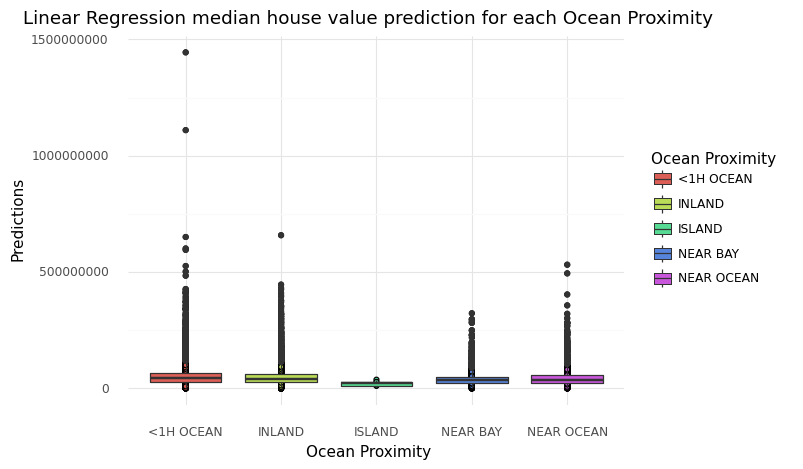

<ggplot: (8768537340217)>

In [ ]:
# predict within ocean proximity category 
H_OCEAN_y_pred = np.absolute(LR.predict(H_OCEAN_X))
INLAND_y_pred = np.absolute(LR.predict(INLAND_X))
ISLAND_y_pred = np.absolute(LR.predict(ISLAND_X))
NEARBAY_y_pred = np.absolute(LR.predict(NEARBAY_X))
NEAROCEAN_y_pred = np.absolute(LR.predict(NEAROCEAN_X))

H_OCEAN_DF = pd.DataFrame({"Ocean Proximity": "<1H OCEAN", "Predictions": H_OCEAN_y_pred})
INLAND_DF = pd.DataFrame({"Ocean Proximity": "INLAND", "Predictions": INLAND_y_pred})
ISLAND_DF = pd.DataFrame({"Ocean Proximity": "ISLAND", "Predictions": ISLAND_y_pred})
NEARBAY_DF = pd.DataFrame({"Ocean Proximity": "NEAR BAY", "Predictions": NEARBAY_y_pred})
NEAROCEAN_DF = pd.DataFrame({"Ocean Proximity": "NEAR OCEAN", "Predictions": NEAROCEAN_y_pred})

all_ocean_DF = pd.concat([H_OCEAN_DF, INLAND_DF, ISLAND_DF, NEARBAY_DF, NEAROCEAN_DF], axis = 0)

# plot of predictions
(ggplot(all_ocean_DF, aes(x = "Ocean Proximity", y = "Predictions", fill = "Ocean Proximity")) +
 geom_point() + 
 geom_boxplot() + theme_minimal() + labs(title = "Linear Regression median house value prediction for each Ocean Proximity"))

In [ ]:
# mean of each category prediction
print("<1H Ocean mean prediction: ", np.absolute(LR.predict(H_OCEAN_X)).mean())
print("Inland mean prediction: ", np.absolute(LR.predict(INLAND_X)).mean())
print("Island mean prediction: ", np.absolute(LR.predict(ISLAND_X)).mean())
print("Near bay mean prediction:", np.absolute(LR.predict(NEARBAY_X)).mean())
print("Near ocean mean prediction: ", np.absolute(LR.predict(NEAROCEAN_X)).mean())

<1H Ocean mean prediction:  52987672.50711607
Inland mean prediction:  50462005.69712525
Island mean prediction:  22400554.7322089
Near bay mean prediction: 41049751.856677674
Near ocean mean predictiion:  46541395.20329841


Our model predicted that houses within 1 hour away of the ocean has the highest median house value. It also predicted that houses on islands have the smallest median house value. According to our model, houses with closer ocean proximity actually do not tend to have higher values. Inland category has on average the second highest predicted value. This was surpising to me, but we also remember to take this model with a grain of salt as it's accuracy is only a little over 60%.

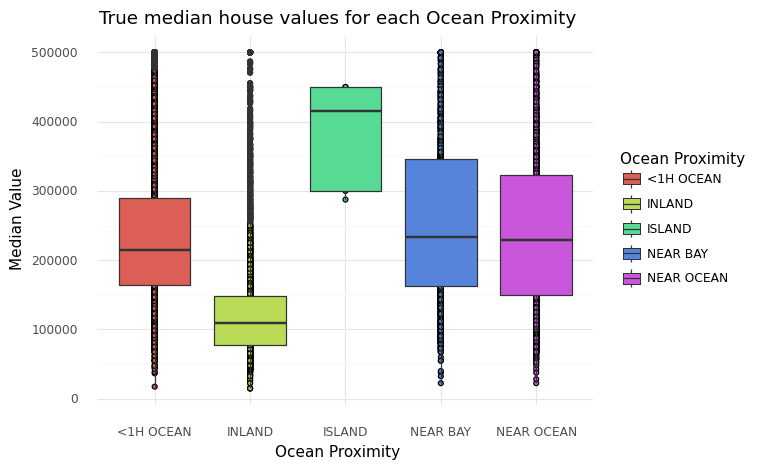

<ggplot: (8768553483641)>

In [ ]:
H_OCEAN_DF1 = pd.DataFrame({"Ocean Proximity": "<1H OCEAN", "Median Value": H_OCEAN_y})
INLAND_DF1 = pd.DataFrame({"Ocean Proximity": "INLAND", "Median Value": INLAND_y})
ISLAND_DF1 = pd.DataFrame({"Ocean Proximity": "ISLAND", "Median Value": ISLAND_y})
NEARBAY_DF1 = pd.DataFrame({"Ocean Proximity": "NEAR BAY", "Median Value": NEARBAY_y})
NEAROCEAN_DF1 = pd.DataFrame({"Ocean Proximity": "NEAR OCEAN", "Median Value": NEAROCEAN_y})

all_ocean_DF1 = pd.concat([H_OCEAN_DF1, INLAND_DF1, ISLAND_DF1, NEARBAY_DF1, NEAROCEAN_DF1], axis = 0)

#plot of true values 
(ggplot(all_ocean_DF1, aes(x = "Ocean Proximity", y = "Median Value", fill = "Ocean Proximity")) +
 geom_point() + 
 geom_boxplot() + theme_minimal()
 + labs(title = "True median house values for each Ocean Proximity"))

Our model predicted a way larger range of values than the true values, our model only accounts for about 60% of the variance so it was not accurate. Our model was most wrong about ISLAND, where the true median house values are the largest out of our categories. I believe this is because we have the least amount of data points for this catergory. Maybe linear regression is not good for this data.

Question:  Based on the silhouette scores and using housingMedianAge, totalBedrooms, and medianIncome, which clustering model is better at categorizing Houses? Why might this be? How can we describe the clusters of the best clustering model?


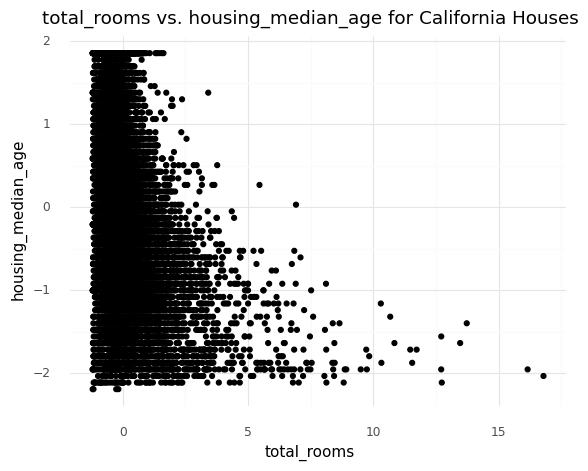

<ggplot: (8768553456061)>

In [ ]:
# data
features = ["total_rooms", "housing_median_age", "median_income"]
X_cluster = df[features]
# z-score
z = StandardScaler()
X_cluster[features] = z.fit_transform(X_cluster[features])

# plot
(ggplot(X_cluster, aes(x = "total_rooms", y = "housing_median_age")) + geom_point() + theme_minimal() + labs(title = "total_rooms vs. housing_median_age for California Houses"))

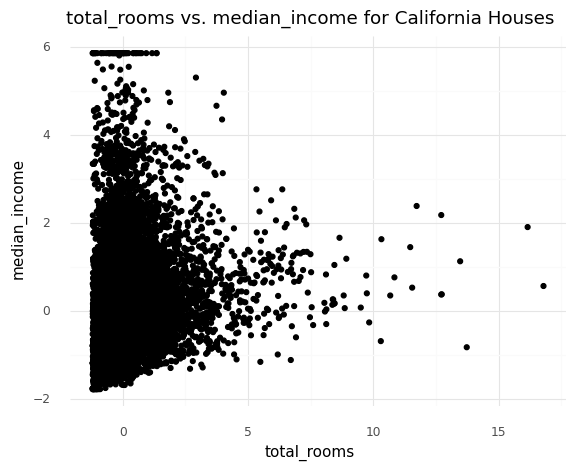

<ggplot: (8768552771337)>

In [ ]:
# plot
(ggplot(X_cluster, aes(x = "total_rooms", y = "median_income")) + geom_point() + theme_minimal() + labs(title = "total_rooms vs. median_income for California Houses"))

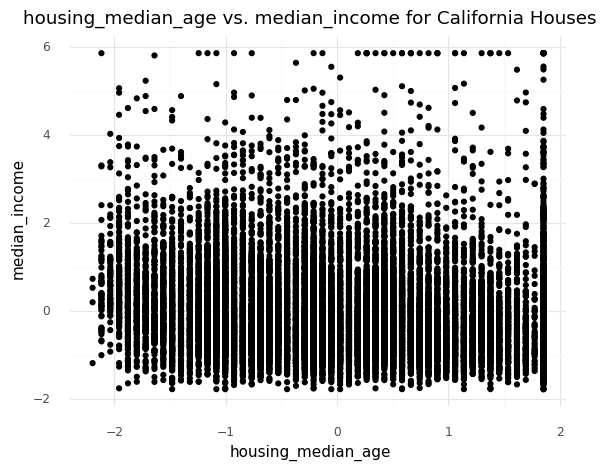

<ggplot: (8768553453625)>

In [ ]:
# plot
(ggplot(X_cluster, aes(x = "housing_median_age", y = "median_income")) + geom_point() + theme_minimal() + labs(title = "housing_median_age vs. median_income for California Houses"))

Based on these ggplots showing the relationship between the three variables we will use the cluster, we can see that the data is very dense and there is no linear or homoskedastic pattern in the first two plots. The third plot shows more linearity and homoskedasticity, but over all all the data points are very close together. We know off the bat that DBScan is not good for this data because it's not effective for high dimenstional, overlapping, varying density data. KMeans is also too simple for this data as it assumes spherical clusters and same amount of data in each cluster. EM may work well as it is more flexible, it allows for different variances and soft assignment. HAC is too slow for this large amount of data, it may also not work because we cannot unmerge clusters so it is less flexible. 

KMeans:

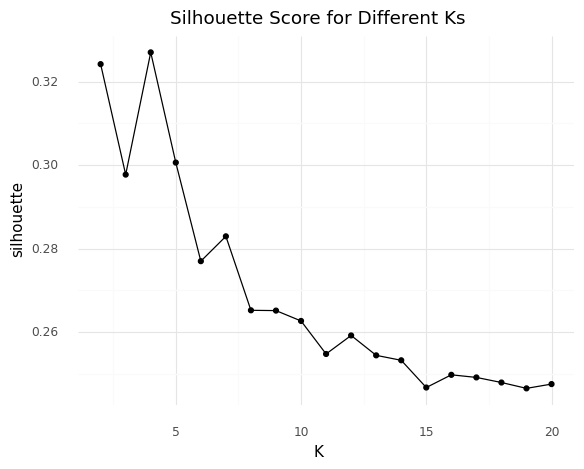

<ggplot: (8768560701089)>

In [ ]:
# hyperparamter tuning
ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

sse = []
sils = []

for k in ks:
    km = KMeans(n_clusters = k)
    km.fit(X_cluster)
    
    sse.append(km.inertia_)
    sils.append(silhouette_score(X_cluster, km.predict(X_cluster)))
    
sse_df = pd.DataFrame({"K": ks,
                      "sse": sse,
                      "silhouette": sils})

(ggplot(sse_df, aes(x = "K", y = "silhouette")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "Silhouette Score for Different Ks"))

The best silhoutte score we can get from KMeans is .32

In [ ]:
# km
km = KMeans(n_clusters = 4)
km.fit(X_cluster)
# label
membership = km.predict(X_cluster)
# score
print("KMeans sil score: ", silhouette_score(X_cluster, membership))

KMeans sil score:  0.32701679490011726


EM:

In [ ]:
n_components = [4,5,6,7,8,9,10,11,12,13]

sils = []
for n in n_components:
    gmm = GaussianMixture(n_components = n)
    gmm.fit(X_cluster)
    colName = str(n) + "assign"
    clusters = gmm.predict(X_cluster)
    
    X_cluster[colName] = clusters
    
    sils.append(silhouette_score(X_cluster, clusters))
    
print(sils)

[0.41747944016222976, 0.47919205820069477, 0.6044082425209055, 0.6893322967090943, 0.7512773408959157, 0.786431062731032, 0.810088397199829, 0.8397122403447232, 0.8589936189499516, 0.885262210078137]


In [ ]:
# EM
EM = GaussianMixture(n_components = 13)
EM.fit(X_cluster)
# lable
em_cluster = EM.predict(X_cluster)
#score
print("EM sil score:: ", silhouette_score(X_cluster, em_cluster))

EM sil score::  0.885262210078137


This is the highest silhoutte score out of all the clustering models

DBScan:

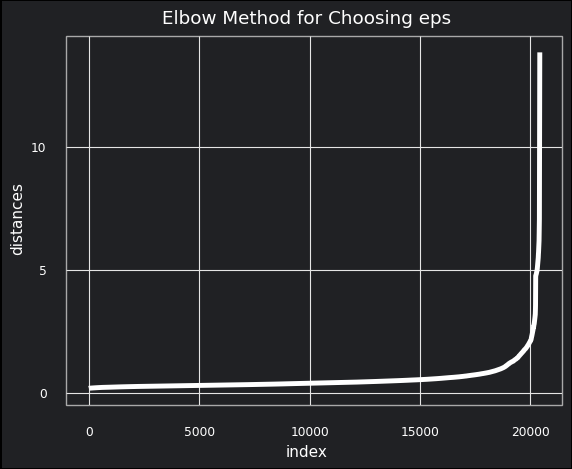

<ggplot: (8768553222325)>

In [ ]:
# Elbw method to find best eps for DBSCAN
mins = 200
nn = NearestNeighbors(n_neighbors = mins + 1)
nn.fit(X_cluster)
distances, neighbors = nn.kneighbors(X_cluster)
distances = np.sort(distances[:, mins], axis = 0)
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
(ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))

In [ ]:
# DB SCAN
db = DBSCAN(eps = 2, min_samples = 200).fit(X_cluster)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db.labels_)))]

X_cluster["assignments"] = db.labels_

# DBScan score
db_clustered = X_cluster.loc[(X_cluster.assignments >= 0)]
print("DBScan sil score:", silhouette_score(db_clustered[["total_rooms", "housing_median_age", "median_income"]], db_clustered["assignments"]))

DBScan sil score: 0.19314470050147442


Understandable, not great for large dense data like this.

HAC:

In [ ]:
# Hierarchical Clustering
hac = AgglomerativeClustering(n_clusters = 3,
                              affinity = "euclidean",
                             linkage = "ward")
hac.fit(X_cluster)
hac_membership = hac.labels_
silhouette_score(X_cluster,membership)

0.15597180022086382

Also extremely low sil score

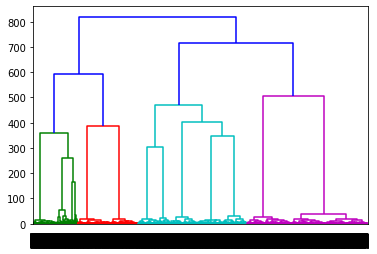

In [ ]:
dendro = sch.dendrogram(sch.linkage(X_cluster, method='ward'))

This dendrogram took 10 mins to compile!! Verticle distance is not great and it is also not efficient, especially if we want to run multiple models since it cannot unmerge clusters. 

We will use EM for clustering since it has the highest sihloutte score 

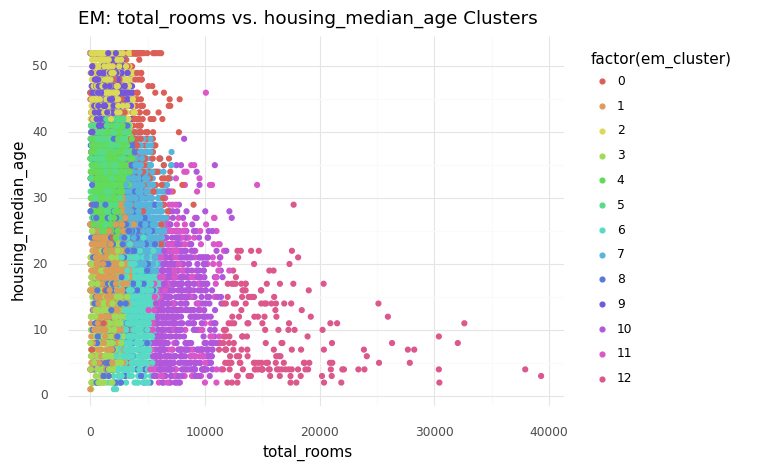

<ggplot: (8768537485669)>

In [ ]:
(ggplot(X, aes(x = "total_rooms", y = "housing_median_age", color = "factor(em_cluster)")) +
 geom_point() + theme_minimal() + labs(title = "EM: total_rooms vs. housing_median_age Clusters"))



*   Hot pink clusters (factor 12) are newer houses with a lot of rooms, these are maybe larger family houses with 7+ rooms
*   Magenta clusters (factor 10 or 11) are more average houses we see often, none are super old and they have an average number of rooms, maybe 3 or 4
*   Lime green clusters (factor 4 or 5) are older houses with little rooms, these are the 1 or 2 bedroom single homes located in historic areas
*   Red, blue, and yellow clusters are like the lime green clusters but older, these may not even be residences because they are so old and have little rooms 
*   Orange and teal (factor 6) clusters are also single homes but built more recently, maybe condos or townhomes. 



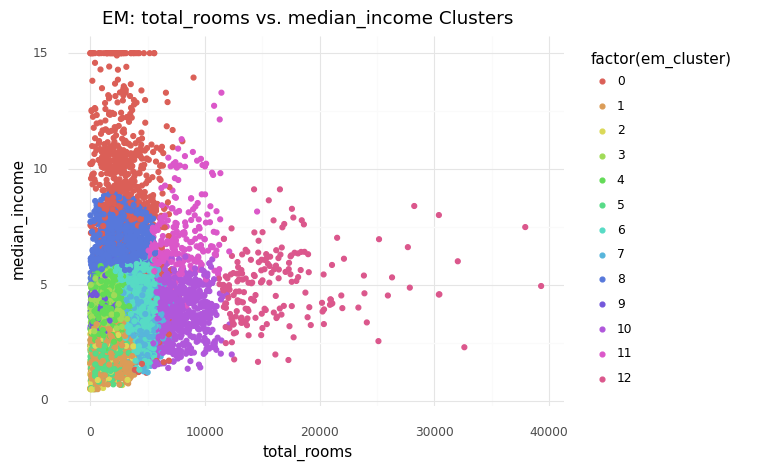

<ggplot: (8768537100325)>

In [ ]:
(ggplot(X, aes(x = "total_rooms", y = "median_income", color = "factor(em_cluster)")) +
 geom_point() + theme_minimal() + labs(title = "EM: total_rooms vs. median_income Clusters"))


*   Red clusters are luxury homes with little rooms, these are the newer trendy single homes, probably located closing to the ocean 
*   Blue (factor 8) houses are more average single family homes, in an average income neighborhood where the houses are smaller 
*   Magenta (factor 10 and 11) are the most common family houses, income varies but they have around 4 or 5 rooms for a family 
*   Hot pink (factor 12) are larger houses for multi-family
*   The remaing clusters are single or studio homes for working singles or students 



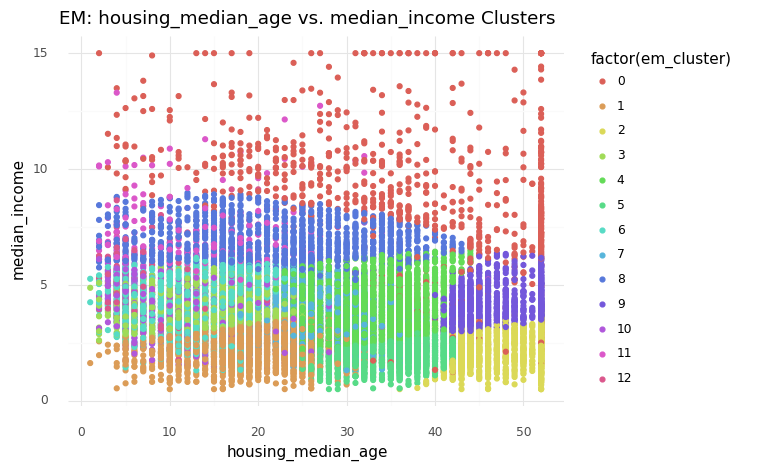

<ggplot: (8768548172277)>

In [ ]:
(ggplot(X, aes(x = "housing_median_age", y = "median_income", color = "factor(em_cluster)" )) +
 geom_point() + theme_minimal() + labs(title = "EM: housing_median_age vs. median_income Clusters"))



*   The red cluster are all the more expensive homes, they vary in age so they include the new luxury beach homes and old luxury real estate 
*   Blue cluster (factor 8) are again the more common family homes, medium income range and varying ages 
*   Orange cluster are the newer single family homes for working class or student
*   Yellow cluster are really old homes that may be hard to sell, so they are for lower income 



In [ ]:
# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null

# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# installing pypandoc
!pip install pypandoc

# connecting your google drive
from google.colab import drive
drive.mount('/content/drive')

# copying your file over. Change "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!cp "drive/My Drive/Colab Notebooks/CPSC392KTangFinal.ipynb" ./

# Again, replace "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!jupyter nbconvert --to PDF "CPSC392KTangFinal.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended t